In [25]:
import os

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from torchsummary import summary
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
path = os.path.expanduser("~/Desktop/joo/data/nest/224/test/JPEGImages/WN24_005.jpg")

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 2080 Ti


In [53]:

# simple_transform = transforms.Compose([
#     transforms.Resize((224,224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
# ])

# train = ImageFolder('',simple_transform)
# print(train.class_to_idx)


def imshow(inp, cmap=None):
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485,0.456,0.406])
    std = np.array([0.229,0.224,0.225])
    inp = std*inp + mean
    inp = np.clip(inp,0,1)
    plt.imshow(inp.cmap)

# train_data_loader = DataLoader(train,batch_size=32,num_workers=3,shuffle=False)
# img,label = next(iter(train_data_loader))
# imshow(img[3])

# vgg = models.vgg16(pretrained=True)

# class LayerActivations():
#     features = None
#     def __init__(self,model,layer_num):
#         self.hook = model[layer_num].register_forward_hook(self.hook_fn)
#     def hook_fn(self,module,input,output):
#         self.features = output.cpu().data.numpy()
#     def remove(self):
#         self.hook.remove()

# conv_out = LayerActivations(vgg.features,0)
# o = vgg(Variable(img))
# conv_out.remove()

# act = conv_out.features



In [45]:
vgg = torchvision.models.vgg16(pretrained=True).to(device)
print(vgg)
class LayerResult:
    def __init__(self, payers, layer_index):
        self.hook = payers[layer_index].register_forward_hook(self.hook_fn)
    
    def hook_fn(self, module, input, output):
        self.features = output.cpu().data.numpy()
    
    def unregister_forward_hook(self):
        self.hook.remove()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [49]:
result = LayerResult(vgg.features, 13)
img = Image.open(path)
img = transforms.ToTensor()(img).unsqueeze(0)

vgg(img.cuda())
activations = result.features

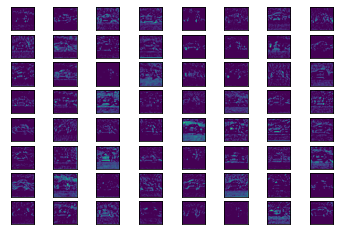

In [57]:
fig, axes = plt.subplots(8,8)
for row in range(8):
    for column in range(8):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*8+column])
plt.show()

odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.17.weight', 'features.17.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'features.21.bias', 'features.24.weight', 'features.24.bias', 'features.26.weight', 'features.26.bias', 'features.28.weight', 'features.28.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.weight', 'classifier.6.bias'])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

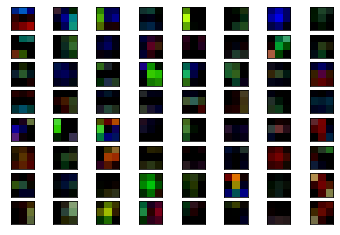

In [51]:
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision import models
from PIL import Image
vgg = models.vgg16(pretrained=True).cuda()

print(vgg.state_dict().keys())
weights = vgg.state_dict()['features.0.weight'].cpu()
fig, axes = plt.subplots(8,8)
for row in range(8):
    for column in range(8):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(weights[row*8+column])
plt.show()

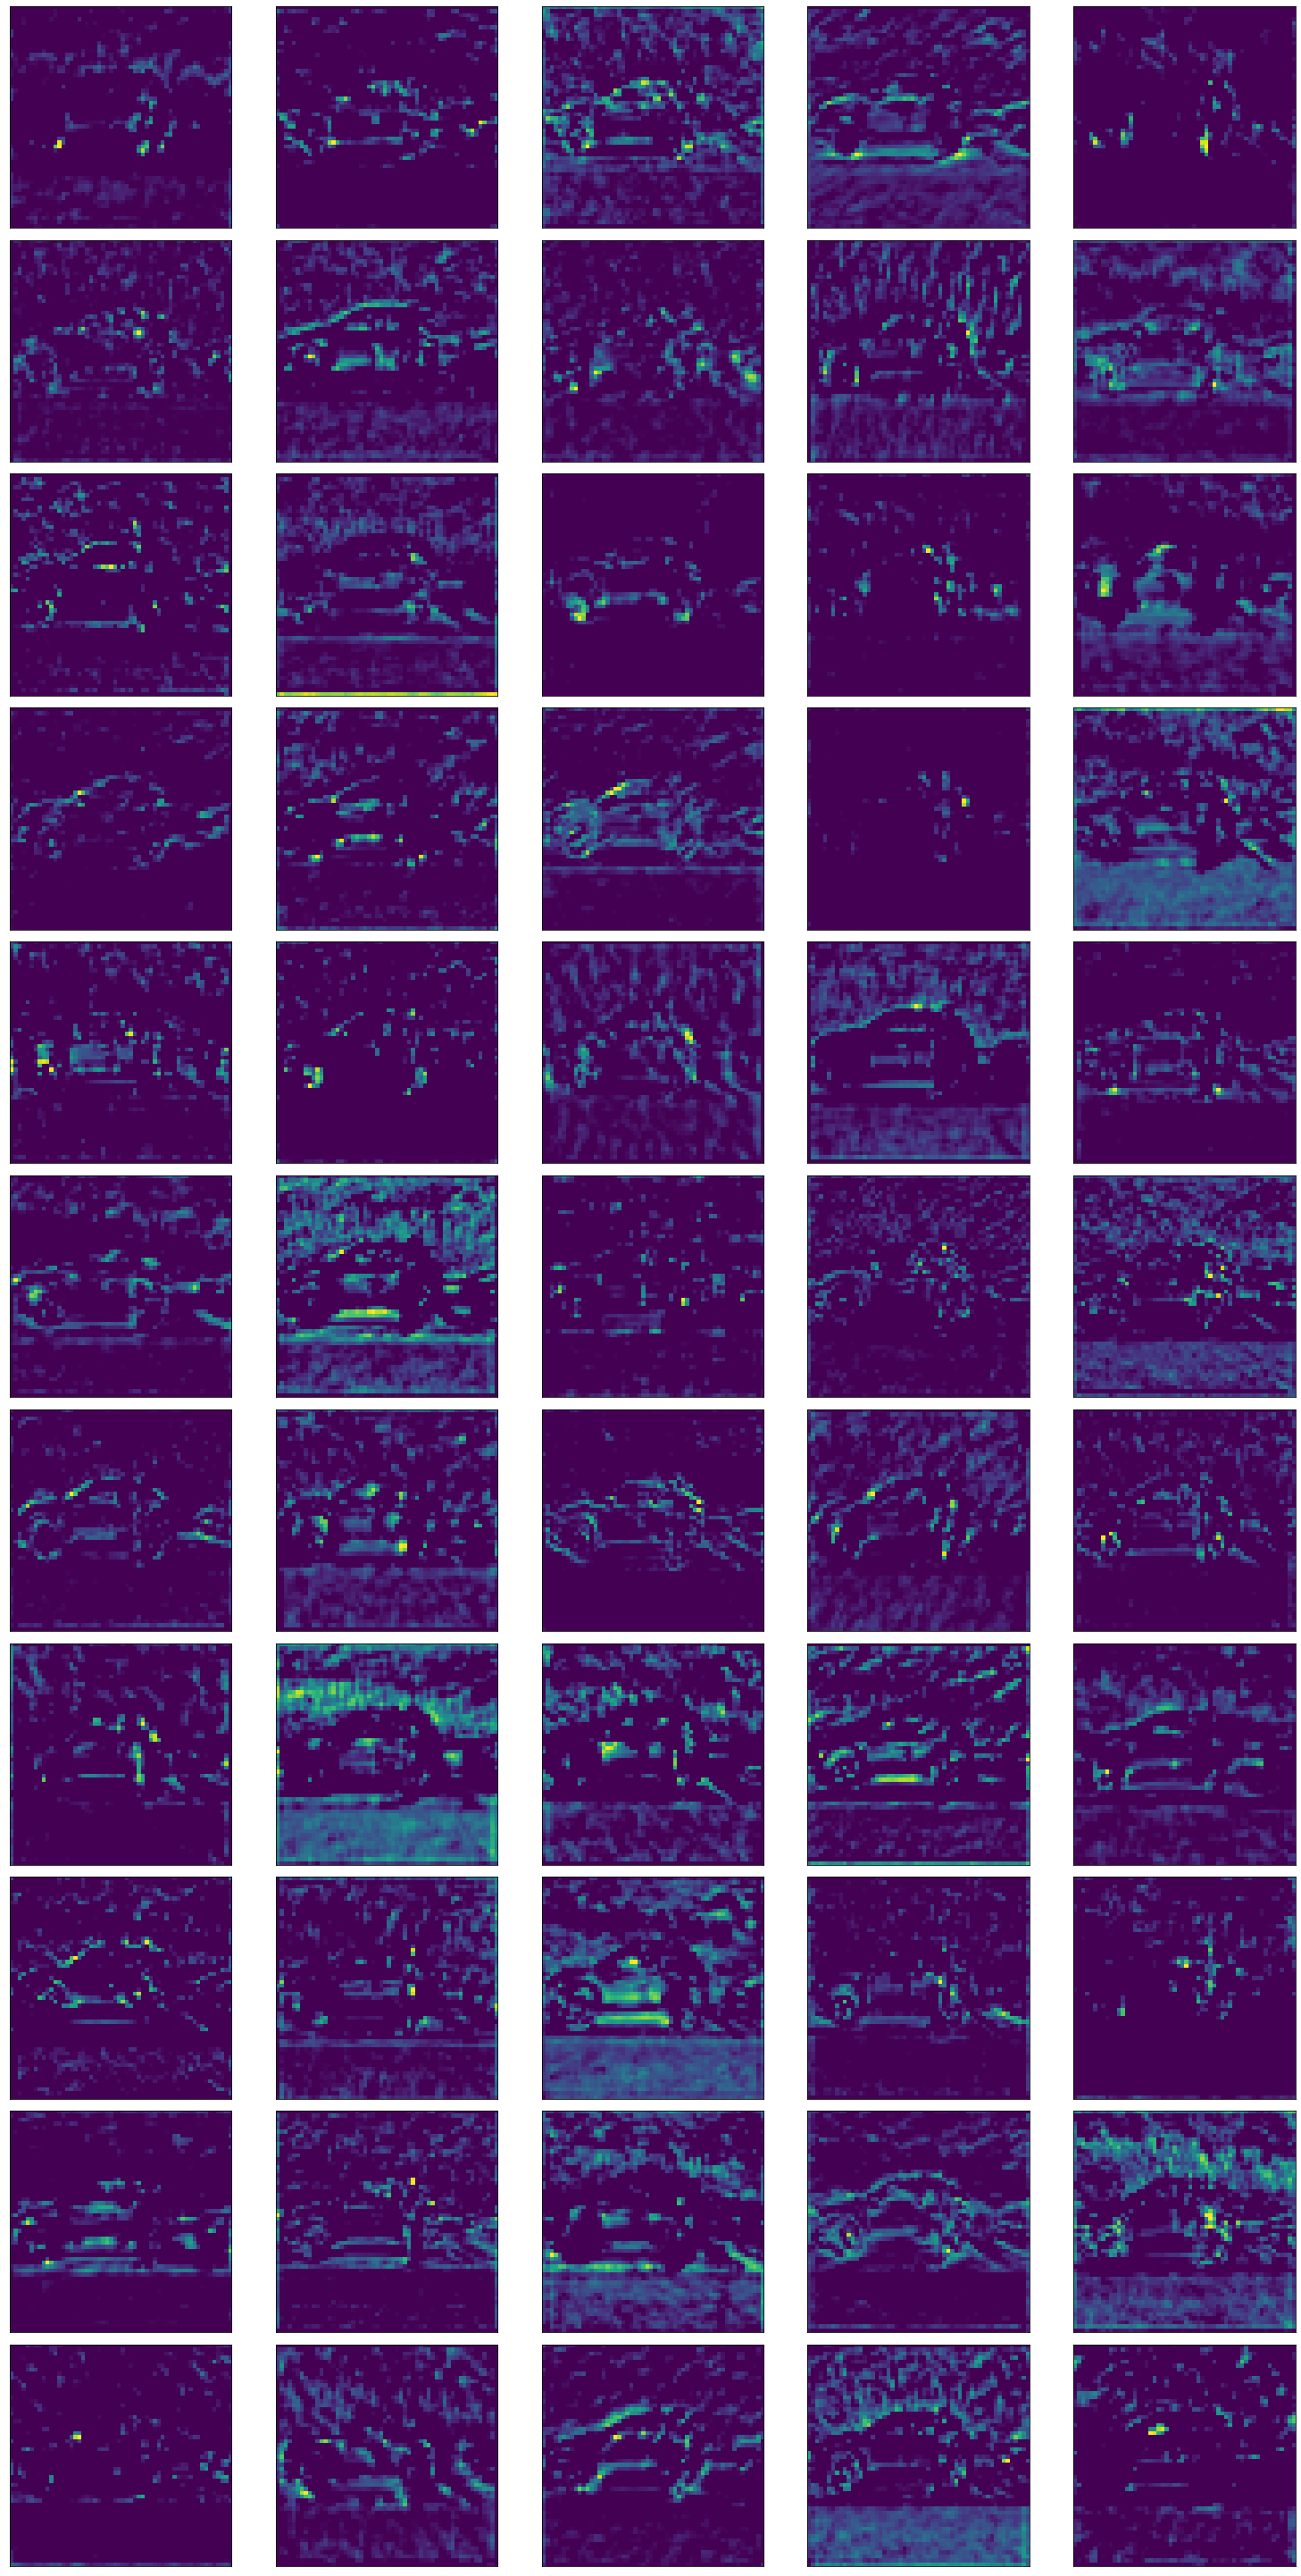

In [65]:
fig = plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.8,hspace=0,wspace=0.2)
for i in range(55):
    ax = fig.add_subplot(11,5,i+1,xticks=[],yticks=[])
    ax.imshow(activations[0][i])